<a href="https://colab.research.google.com/github/jon-chun/sentimenttime/blob/main/ts_dtw_clustering_dtaidistance_20210818.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DTW Clustering with dtaidistance**

* https://github.com/wannesm/dtaidistance

## **Setup**

In [2]:
!pip install dtaidistance[all]

In [3]:
%matplotlib inline

In [4]:
import random
import array

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

In [7]:
from IPython.display import Image

In [43]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# **Get Data**

In [9]:
# Connect to Google gDrive

# Flag to indicate first run through code 
flag_first_run = True

from google.colab import drive, files
drive.mount('/gdrive')
%cd /gdrive/MyDrive/

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive


In [10]:
gdrive_subdir = "./research/2021/sa_book_code/books_sa/cdickens_greatexpectations" #@param {type:"string"}


In [11]:
flag_first_run = True

CORPUS_SUBDIR = gdrive_subdir
corpus_filename = CORPUS_SUBDIR

# Change to working subdirectory
if flag_first_run == True:
  full_path_str = gdrive_subdir
  flag_first_run = False
else:
  full_path_str = f'/gdrive/MyDrive{gdrive_subdir[1:]}'

%cd $full_path_str

/gdrive/MyDrive/research/2021/sa_book_code/books_sa/cdickens_greatexpectations


In [12]:
!ls -altr *.csv

-rw------- 1 root root   1223407 Jul 30 03:49 sum_sentiments_syuzhetR_4models_sentimenttimeraw_cdickens_greatexpectations.csv
-rw------- 1 root root   1808344 Jul 30 03:50 sum_sentiments_sentimentR_7models_sentimenttimeraw_cdickens_greatexpectations.csv
-rw------- 1 root root   2066337 Jul 30 05:21 sum_sentiments_sents_trans_cdickens_greatexpectations.csv
-rw------- 1 root root     94156 Jul 30 06:58 cruxes_table_unified_subset_cdickens_greatexpectations_20210730_0658.csv
-rw------- 1 root root   6238213 Jul 30 07:01 sum_sentiments_sents_syuzhetr_cdickens_greatexpectations.csv
-rw------- 1 root root   8365646 Jul 30 07:01 sum_sentiments_sents_sentimentr_cdickens_greatexpectations.csv
-rw------- 1 root root  11818121 Jul 30 07:01 sum_sentiments_sents_transformer_cdickens_greatexpectations.csv
-rw------- 1 root root   5131020 Jul 30 07:01 sum_sentiments_all31_sents_cdickens_cdickens_greatexpectations.csv
-rw------- 1 root root     94156 Jul 30 07:01 crux_table_unified_subset_cdickens_cdi

In [13]:
corpus_unified_df = pd.read_csv('sum_sentiments_all31_sents_cdickens_cdickens_greatexpectations.csv')

In [18]:
corpus_unified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7230 entries, 0 to 7229
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    7230 non-null   int64  
 1   sent_no                                       7230 non-null   int64  
 2   sent_raw                                      7230 non-null   object 
 3   baseline_sentimentr_stdscaler_roll10          6508 non-null   float64
 4   baseline_syuzhet_stdscaler_roll10             6508 non-null   float64
 5   baseline_bing_stdscaler_roll10                6508 non-null   float64
 6   baseline_sentiword_stdscaler_roll10           6508 non-null   float64
 7   baseline_senticnet_stdscaler_roll10           6508 non-null   float64
 8   baseline_nrc_stdscaler_roll10                 6508 non-null   float64
 9   baseline_afinn_stdscaler_roll10               6508 non-null   f

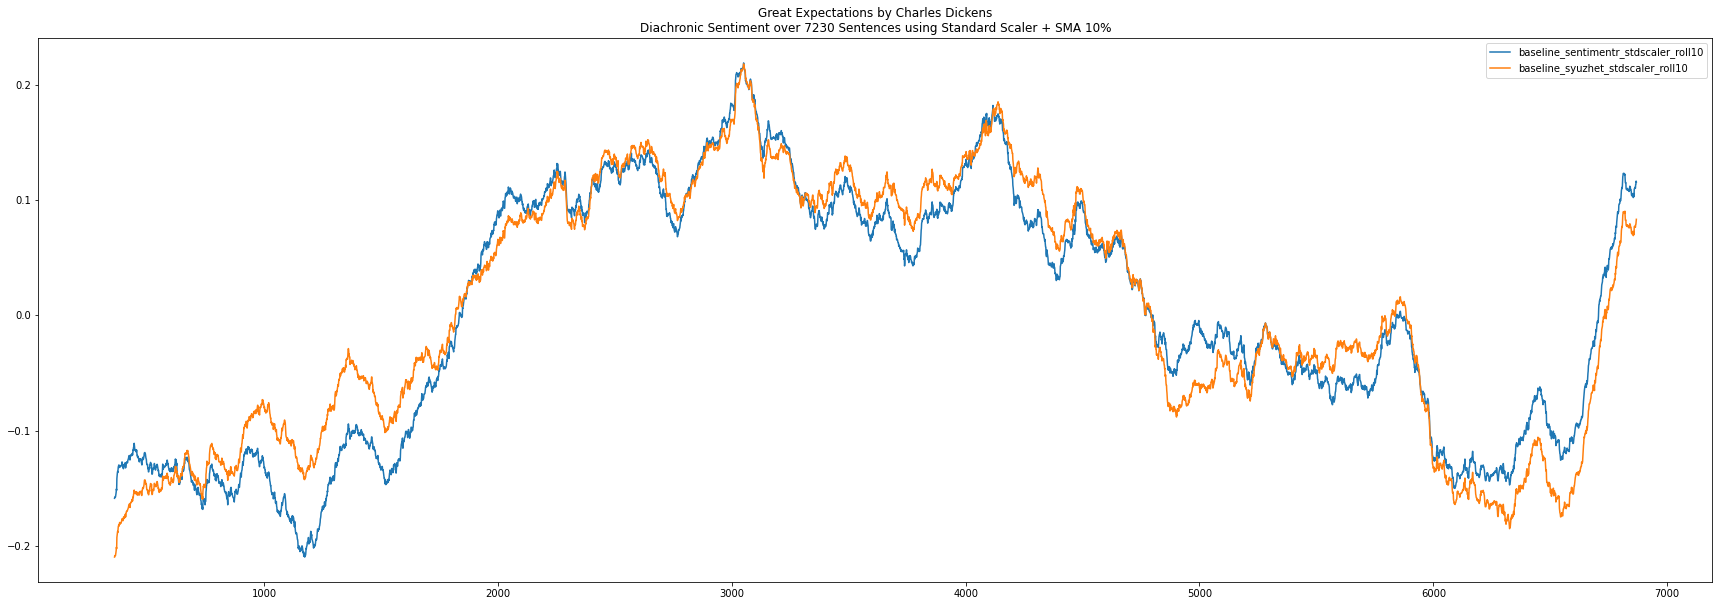

In [44]:
corpus_unified_df['baseline_sentimentr_stdscaler_roll10'].plot()
corpus_unified_df['baseline_syuzhet_stdscaler_roll10'].plot()
sent_ct = corpus_unified_df.shape[0]
plt.legend(loc='best')
plt.title(f'Great Expectations by Charles Dickens\nDiachronic Sentiment over {sent_ct} Sentences using Standard Scaler + SMA 10%');

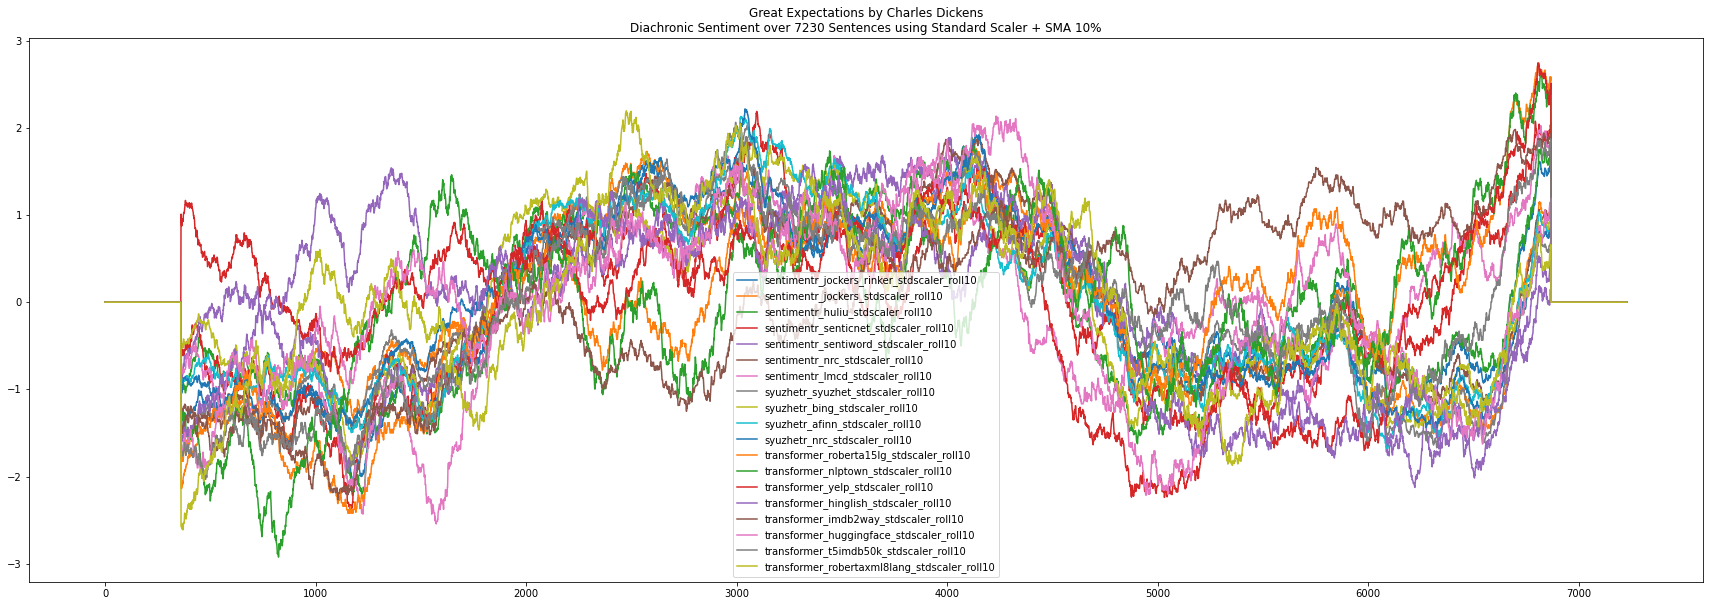

In [45]:
ts_sentiments_df = corpus_unified_df.filter(like='roll10').copy()
ts_sentiments_df.fillna(0, inplace=True)
# print(f'Time Series Count: {sent_ct}')
ts_sentiments_df.filter(regex='^(sentimentr|syuzhet|transformer)',axis=1).plot()
plt.legend(loc='best')
plt.title(f'Great Expectations by Charles Dickens\nDiachronic Sentiment over {sent_ct} Sentences using Standard Scaler + SMA 10%');

## **Compute Distance Matrix between 2 Series**

In [ ]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
s1 = np.array([0., 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0])
s2 = np.array([0., 1, 2, 3, 1, 0, 0, 0, 2, 1, 0, 0, 0])
path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path, filename="warp.png")

(None, None)

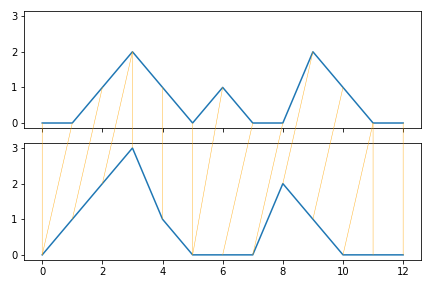

In [ ]:
Image(filename='warp.png') 

In [ ]:
res = [random.randrange(1, 50, 1) for i in range(7)]

In [ ]:
# Option #1: pandas

s1 = [0, 0, 1, 2, 1, 0, 1, 0, 0]
s2 = [0, 1, 2, 0, 0, 0, 0, 0, 0]
distance = dtw.distance(s1, s2)
print(distance)

1.4142135623730951


In [ ]:
print(dtw.distance.__doc__)


    Dynamic Time Warping.

    This function keeps a compact matrix, not the full warping paths matrix.

    Uses dynamic programming to compute:

    wps[i, j] = (s1[i]-s2[j])**2 + min(
                    wps[i-1, j  ] + penalty,  // vertical   / insertion / expansion
                    wps[i  , j-1] + penalty,  // horizontal / deletion  / compression
                    wps[i-1, j-1])            // diagonal   / match
    dtw = sqrt(wps[-1, -1])

    :param s1: First sequence
    :param s2: Second sequence
    :param window: Only allow for maximal shifts from the two diagonals smaller than this number.
        It includes the diagonal, meaning that an Euclidean distance is obtained by setting window=1.
    :param max_dist: Stop if the returned values will be larger than this value
    :param max_step: Do not allow steps larger than this value
    :param max_length_diff: Return infinity if length of two series is larger
    :param penalty: Penalty to add if compression or expansion 

In [ ]:
%%timeit

# 100 datapoints: 159ms
# 300 datapoints: 1.5s
# 500 datapoints: 4.3s
# 1k datapoints: 17.7s
# 5k datapoints: ?(1.55s)
# 10k datapoints: >15m

dist_ls = []

for i in range(10):
  r1 = [random.randrange(1, 50, 1) for i in range(10000)]
  r2 = [random.randrange(1, 50, 1) for i in range(10000)]
  dist_fl = dtw.distance(r1, r2)
  dist_ls.append(dist_fl)

print(f'Mean: {sum(dist_ls)/len(dist_ls)}')

In [ ]:
%%timeit

# 100 datapoints: 159ms
# 300 datapoints: 1.5s
# 500 datapoints: 4.3s
# 1k datapoints: 17.7s
# 5k datapoints: ?(1.55s)
# 10k datapoints: 

dist_ls = []

for i in range(10):
  r1 = [random.randrange(1, 50, 1) for i in range(5000)]
  r2 = [random.randrange(1, 50, 1) for i in range(5000)]
  dist_fl = dtw.distance(r1, r2)
  dist_ls.append(dist_fl)

print(f'Mean: {sum(dist_ls)/len(dist_ls)}')

In [ ]:
# Option #2 (30-3000x faster) c implementation requires array w/doubles (and optionally max_dist pruning)

s1 = array.array('d',[0, 0, 1, 2, 1, 0, 1, 0, 0])
s2 = array.array('d',[0, 1, 2, 0, 0, 0, 0, 0, 0])
d = dtw.distance_fast(s1, s2, use_pruning=True)
print(d)

1.4142135623730951


In [ ]:
%%timeit

# 100 datapoints: 3ms
# 300 datapoints: 12.3ms
# 500 datapoints: 26ms
# 1k datapoints: 81.3ms
# 5k datapoints: 1.55s
# 10k datapoints: 6s

dist_fast_ls = []

for i in range(10):
  r1 = array.array('d',[random.randrange(1, 50, 1) for i in range(1000)])
  r2 = array.array('d',[random.randrange(1, 50, 1) for i in range(1000)])
  dist_fl = dtw.distance_fast(r1, r2)
  dist_fast_ls.append(dist_fl)

print(f'Mean: {sum(dist_fast_ls)/len(dist_fast_ls)}')

Mean: 270.48008181146736
Mean: 271.41714997830843
Mean: 270.65666271453847
Mean: 271.86369252563634
Mean: 272.8423453740766
Mean: 271.9243217482922
Mean: 271.8005687477981
Mean: 271.43836689758933
Mean: 273.12100571191843
Mean: 271.67066620998287
Mean: 271.74864069725714
Mean: 272.73562020615014
Mean: 271.8488282826024
Mean: 272.02190088165173
Mean: 270.97758535069727
Mean: 272.7380632937058
Mean: 270.84885096813804
Mean: 272.27596541210835
Mean: 269.2342333866586
Mean: 273.1527364331788
Mean: 269.8315804097517
Mean: 271.4995188618768
Mean: 271.7387215446521
Mean: 272.52916755144923
Mean: 271.26842717010334
Mean: 271.7758497440616
Mean: 272.34024159697475
Mean: 272.4069984470946
Mean: 272.40118719657715
Mean: 270.91694587756353
Mean: 273.4039360614202
Mean: 271.3292284428137
Mean: 271.22384874354196
Mean: 272.39988178641795
Mean: 272.3801439994921
Mean: 270.7905400488939
Mean: 271.5324591606151
Mean: 272.0231489907127
Mean: 272.54653178627905
Mean: 271.2171505939467
Mean: 269.834317225

In [ ]:
# Option #3: Numpy array with doubles or floats

s1 = np.array([0, 0, 1, 2, 1, 0, 1, 0, 0], dtype=np.double)
s2 = np.array([0.0, 1, 2, 0, 0, 0, 0, 0, 0])
d = dtw.distance_fast(s1, s2, use_pruning=True)

In [ ]:
%%timeit

# 100 datapoints: 3ms
# 300 datapoints: 12.3ms
# 500 datapoints: 26ms
# 1k datapoints: 82ms
# 5k datapoints: 1.55s
# 10k datapoints: 6s

dist_c_ls = []

for i in range(10):
  r1 = np.array([random.randrange(1, 50, 1) for i in range(1000)], dtype=np.double)
  r2 = np.array([random.randrange(1, 50, 1) for i in range(1000)], dtype=np.double)
  dist_fl = dtw.distance_fast(r1, r2)
  dist_c_ls.append(dist_fl)

print(f'Mean: {sum(dist_c_ls)/len(dist_c_ls)}')

Mean: 271.43135558327515
Mean: 273.1465367993586
Mean: 273.04205997005215
Mean: 270.5008342732676
Mean: 271.93090630468475
Mean: 273.91017086772763
Mean: 270.9300746348973
Mean: 271.3716095727023
Mean: 272.26103209700307
Mean: 272.74649891641604
Mean: 273.5779559698817
Mean: 270.87134618760456
Mean: 271.8799714467423
Mean: 273.20986999600814
Mean: 274.02990923071906
Mean: 271.70523991626493
Mean: 272.4704640561773
Mean: 272.89817655328807
Mean: 272.66605153187106
Mean: 271.62553944064877
Mean: 270.66351599826703
Mean: 271.6567749922563
Mean: 271.3832917716053
Mean: 271.2609677263476
Mean: 273.61827028029063
Mean: 272.10073002439947
Mean: 271.50243239113604
Mean: 271.7337774360551
Mean: 270.2783358547231
Mean: 270.2170517224263
Mean: 271.7058617925477
Mean: 270.12677207661307
Mean: 270.9679241082398
Mean: 271.1806378304474
Mean: 272.3764996338168
Mean: 270.05149872034417
Mean: 272.4299291782288
Mean: 270.19148342140454
Mean: 273.731215639918
Mean: 270.7064102358698
Mean: 272.40021797761

## **Visualize Warping Paths**

In [ ]:
s1 = [0, 0, 1, 2, 1, 0, 1, 0, 0]
s2 = [0, 1, 2, 0, 0, 0, 0, 0, 0]
distance, paths = dtw.warping_paths(s1, s2)
print(distance)
print(paths)

1.4142135623730951
[[0.                inf        inf        inf        inf        inf
         inf        inf        inf        inf]
 [       inf 0.         1.         2.23606798 2.23606798 2.23606798
  2.23606798 2.23606798 2.23606798 2.23606798]
 [       inf 0.         1.         2.23606798 2.23606798 2.23606798
  2.23606798 2.23606798 2.23606798 2.23606798]
 [       inf 1.         0.         1.         1.41421356 1.73205081
  2.         2.23606798 2.44948974 2.44948974]
 [       inf 2.23606798 1.         0.         2.         2.44948974
  2.64575131 2.82842712 3.         3.16227766]
 [       inf 2.44948974 1.         1.         1.         1.41421356
  1.73205081 2.         2.23606798 2.44948974]
 [       inf 2.44948974 1.41421356 2.23606798 1.         1.
  1.         1.         1.         1.        ]
 [       inf 2.64575131 1.41421356 1.73205081 1.41421356 1.41421356
  1.41421356 1.41421356 1.41421356 1.41421356]
 [       inf 2.64575131 1.73205081 2.44948974 1.41421356 1.41421356
 

(<Figure size 720x720 with 4 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7efe88eb3650>])

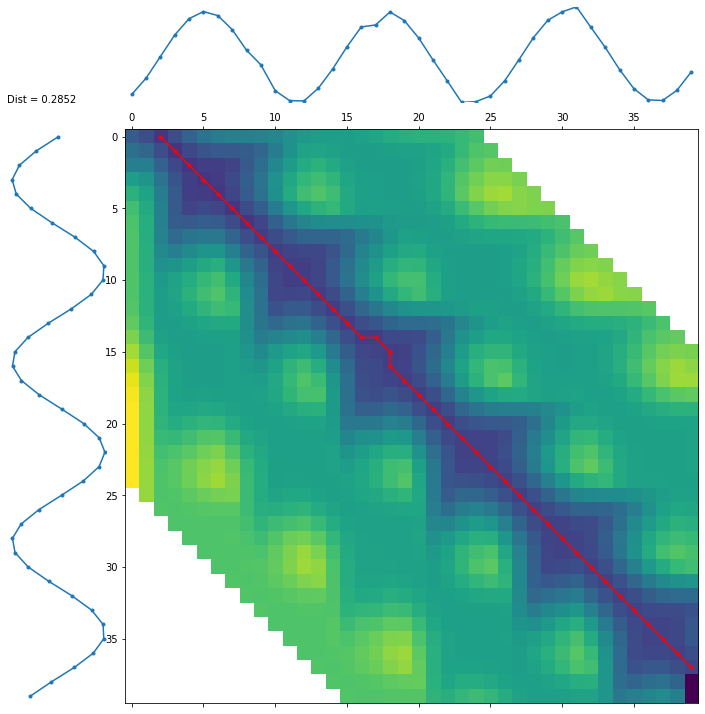

In [ ]:
x = np.arange(0, 20, .5)
s1 = np.sin(x)
s2 = np.sin(x - 1)
random.seed(1)
for idx in range(len(s2)):
    if random.random() < 0.05:
        s2[idx] += (random.random() - 0.5) / 2
d, paths = dtw.warping_paths(s1, s2, window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

## **Compute Distance Matrix between Set of Series**

In [ ]:
series = [
    np.array([0, 0, 1, 2, 1, 0, 1, 0, 0], dtype=np.double),
    np.array([0.0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0]),
    np.array([0.0, 0, 1, 2, 1, 0, 0, 0])]
ds = dtw.distance_matrix_fast(series)

In [ ]:
series = np.matrix([
    [0.0, 0, 1, 2, 1, 0, 1, 0, 0],
    [0.0, 1, 2, 0, 0, 0, 0, 0, 0],
    [0.0, 0, 1, 2, 1, 0, 0, 0, 0]])

ds = dtw.distance_matrix_fast(series)

In [ ]:
ds

array([[0.        , 1.41421356, 1.        ],
       [1.41421356, 0.        , 1.        ],
       [1.        , 1.        , 0.        ]])

In [ ]:
[random.randrange(1, 50, 1) for i in range(10)]
print('\n')
[random.randrange(1, 50, 1) for i in range(10)]
print('\n')
[random.randrange(1, 50, 1) for i in range(10)]
print('\n')
[random.randrange(1, 50, 1) for i in range(10)]

[42, 38, 22, 20, 2, 46, 26, 6, 27, 42]

[34, 25, 43, 48, 5, 47, 13, 22, 5, 6]

[4, 36, 34, 46, 3, 48, 19, 21, 5, 44]

[46, 17, 6, 8, 41, 1, 12, 18, 36, 39]

In [24]:
series = [
    np.array([random.randrange(1, 50, 1) for i in range(1000)], dtype=np.double),
    np.array([random.randrange(1, 50, 1) for i in range(1000)], dtype=np.double),
    np.array([random.randrange(1, 50, 1) for i in range(1000)], dtype=np.double),
    np.array([random.randrange(1, 50, 1) for i in range(1000)], dtype=np.double),
    np.array([random.randrange(1, 50, 1) for i in range(1000)], dtype=np.double),
    np.array([random.randrange(1, 50, 1) for i in range(1000)], dtype=np.double),
    np.array([random.randrange(1, 50, 1) for i in range(1000)], dtype=np.double),
    np.array([random.randrange(1, 50, 1) for i in range(1000)], dtype=np.double),
    np.array([random.randrange(1, 50, 1) for i in range(1000)], dtype=np.double),
    np.array([random.randrange(1, 50, 1) for i in range(1000)], dtype=np.double)]
ds = dtw.distance_matrix_fast(series)

In [ ]:
ds

array([[  0.        , 266.1183947 , 270.71941194, 274.07298298,
        275.61023203, 273.84119486, 268.04850307, 270.63628729,
        275.11088673, 265.21123656],
       [266.1183947 ,   0.        , 271.39086204, 271.09223523,
        276.85916998, 273.36605495, 269.4290259 , 272.07535721,
        271.49585632, 269.46613887],
       [270.71941194, 271.39086204,   0.        , 275.05999346,
        276.42177917, 273.91604553, 267.95895208, 276.80679182,
        269.43644891, 269.76285882],
       [274.07298298, 271.09223523, 275.05999346,   0.        ,
        266.72270245, 269.71281023, 266.81454233, 268.11378182,
        275.09634676, 273.04395251],
       [275.61023203, 276.85916998, 276.42177917, 266.72270245,
          0.        , 271.93197679, 271.87681034, 274.82721845,
        272.07903264, 275.52132404],
       [273.84119486, 273.36605495, 273.91604553, 269.71281023,
        271.93197679,   0.        , 270.97416851, 276.34036983,
        273.17210692, 276.83749746],
       [26

In [ ]:
# Can be distributed and parallelized

### **Sentence Sentiment Time Series**

In [51]:
ts_sentiments_df.isna().any()

baseline_sentimentr_stdscaler_roll10            False
baseline_syuzhet_stdscaler_roll10               False
baseline_bing_stdscaler_roll10                  False
baseline_sentiword_stdscaler_roll10             False
baseline_senticnet_stdscaler_roll10             False
baseline_nrc_stdscaler_roll10                   False
baseline_afinn_stdscaler_roll10                 False
baseline_vader_stdscaler_roll10                 False
baseline_textblob_stdscaler_roll10              False
baseline_flair_stdscaler_roll10                 False
baseline_pattern_stdscaler_roll10               False
baseline_stanza_stdscaler_roll10                False
sentimentr_jockers_rinker_stdscaler_roll10      False
sentimentr_jockers_stdscaler_roll10             False
sentimentr_huliu_stdscaler_roll10               False
sentimentr_senticnet_stdscaler_roll10           False
sentimentr_sentiword_stdscaler_roll10           False
sentimentr_nrc_stdscaler_roll10                 False
sentimentr_lmcd_stdscaler_ro

In [49]:
ts_sentiments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7230 entries, 0 to 7229
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   baseline_sentimentr_stdscaler_roll10          7230 non-null   float64
 1   baseline_syuzhet_stdscaler_roll10             7230 non-null   float64
 2   baseline_bing_stdscaler_roll10                7230 non-null   float64
 3   baseline_sentiword_stdscaler_roll10           7230 non-null   float64
 4   baseline_senticnet_stdscaler_roll10           7230 non-null   float64
 5   baseline_nrc_stdscaler_roll10                 7230 non-null   float64
 6   baseline_afinn_stdscaler_roll10               7230 non-null   float64
 7   baseline_vader_stdscaler_roll10               7230 non-null   float64
 8   baseline_textblob_stdscaler_roll10            7230 non-null   float64
 9   baseline_flair_stdscaler_roll10               7230 non-null   f

In [47]:
ts_sentiments_np = ts_sentiments_df.to_numpy().T
ts_sentiments_np.shape

(31, 7230)

In [48]:
%%time

# NOTE: 2m

ds = dtw.distance_matrix_fast(ts_sentiments_np)

CPU times: user 2min 26s, sys: 217 ms, total: 2min 26s
Wall time: 1min 52s


In [38]:
series = [
    np.array(list(ts_sentiments_df['baseline_syuzhet_stdscaler_roll10']), dtype=np.double),
    np.array(list(ts_sentiments_df['baseline_sentimentr_stdscaler_roll10']), dtype=np.double),
    np.array(list(ts_sentiments_df['baseline_bing_stdscaler_roll10']), dtype=np.double)]
ds = dtw.distance_matrix_fast(series)

In [40]:
type(ds)

numpy.ndarray

In [39]:
ds.shape

(3, 3)

# **Visualize Hierarchical Clustering**

In [33]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30, 10)

In [53]:
%%time

# NOTE: 2m

from dtaidistance import clustering
# Custom Hierarchical clustering
# model1 = clustering.Hierarchical(dtw.distance_matrix_fast, {})
# cluster_idx = model1.fit(series)

# Augment Hierarchical object to keep track of the full tree
# model2 = clustering.HierarchicalTree(model1)
# cluster_idx = model2.fit(series)


# SciPy linkage clustering
model3 = clustering.LinkageTree(dtw.distance_matrix_fast, {})
cluster_idx = model3.fit(ts_sentiments_np) # (series)

CPU times: user 2min 26s, sys: 242 ms, total: 2min 26s
Wall time: 1min 51s


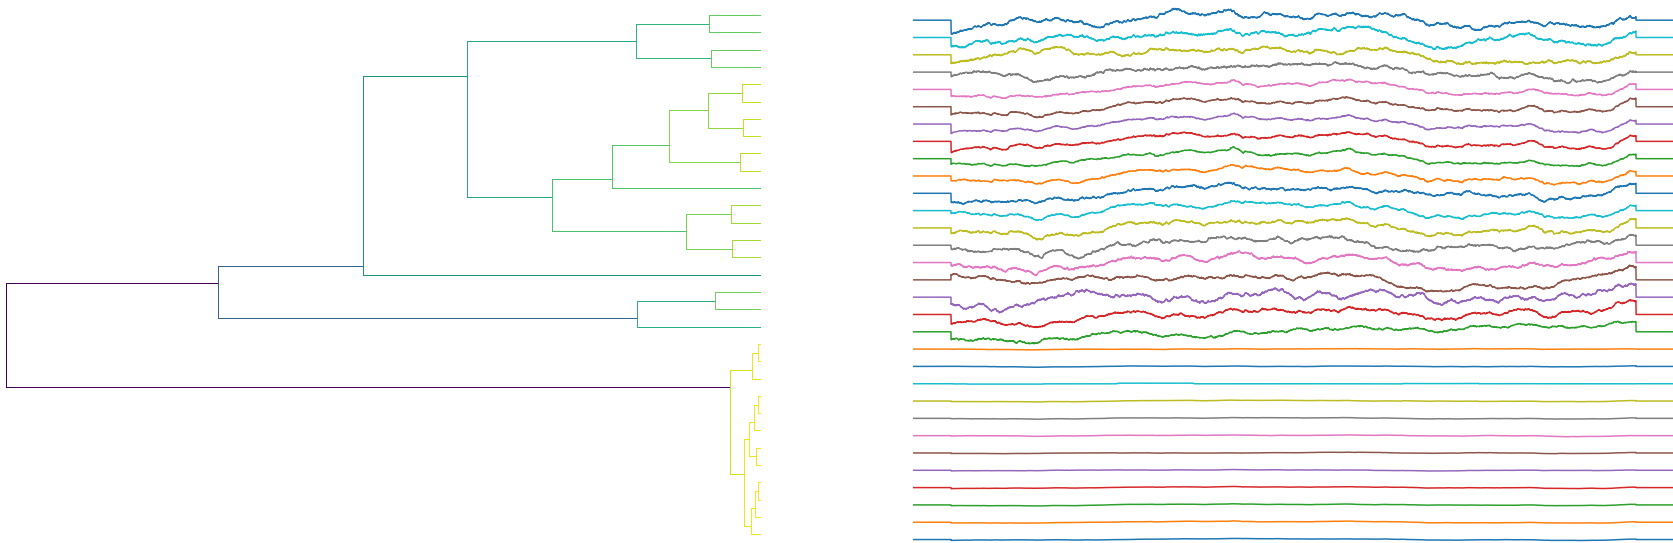

In [54]:
model3.plot("myplot.png")
Image(filename='myplot.png') 

In [ ]:
ts_labels = ['SentimentR',
             'SyuzhetR',
             'TextBlob',
             'Flair',
             'Stanza',
             'Logistic Regression',
             'LSTM',
             'CNN',
             'RoBERTa 15 Large',
             'T5']


fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(30, 10))
# show_ts_label = lambda idx: "ts-" + str(idx)
show_ts_label = lambda idx: ts_labels[idx]
model3.plot("hierarchy.png", axes=ax, show_ts_label=show_ts_label,
           show_tr_label=True, ts_label_margin=-100,
           ts_left_margin=5, ts_sample_length=1)

(None, None)

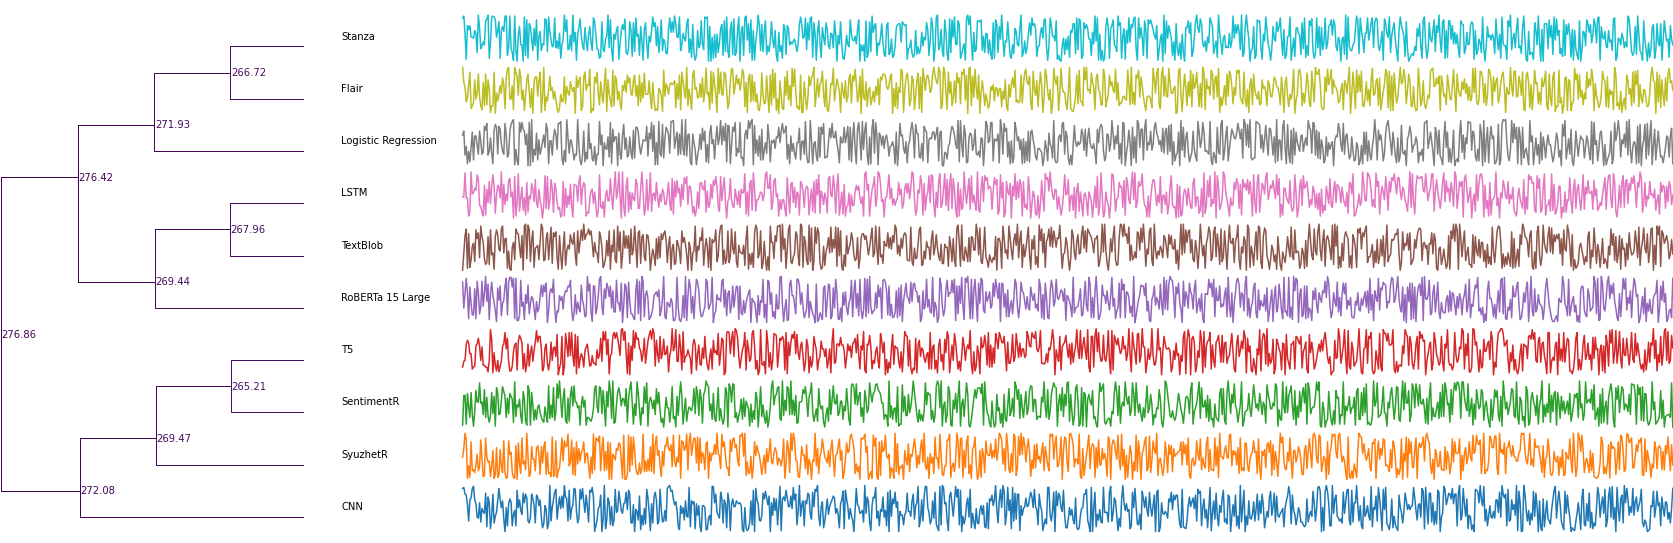

In [ ]:
Image(filename='hierarchy.png') 

In [ ]:
from dtaidistance import clustering

# Custom Hierarchical clustering
# model1 = clustering.Hierarchical(dtw.distance_matrix_fast, {})
# cluster_idx = model1.fit(series)

# Augment Hierarchical object to keep track of the full tree
# model2 = clustering.HierarchicalTree(model1)
# cluster_idx = model2.fit(series)



# SciPy linkage clustering
model3 = clustering.LinkageTree(dtw.distance_matrix_fast, {})
cluster_idx = model3.fit(series)

In [ ]:
model3.plot("myplot.png")

(None, None)